<a href="https://colab.research.google.com/github/siddhant-uniyal/ML_Fundamentals/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
from sklearn import preprocessing
import seaborn as sns

In [ ]:
titanic_train_file_id = '1MsgZdBRqNfHPnaeSUKCPEFwmxmN4j03x'
titanic_train_target_path = 'titanic_train.csv'

gdown.download(f'https://drive.google.com/uc?id={titanic_train_file_id}', titanic_train_target_path, quiet=False)

In [ ]:
train = pd.read_csv(titanic_train_target_path)
train

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(train.loc[: , "Name"])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [ ]:
pattern = r',\s([A-Za-z]+\.)\s' #every title has a comma and space before it , and a space after it

train["Title"] = train["Name"].str.extract(pattern)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [ ]:
train.drop(columns = ["PassengerId" , "Ticket" , "Name"] , inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev.
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss.
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr.


In [ ]:
table = pd.DataFrame(columns = ["Column Name" , "NaN Count" , "Percentage of NaN Count"])

row_count = train.shape[0]

for column in train.columns:
  na_count = train[column].isna().sum()
  percent_na_count = round(na_count*100/row_count , 2)
  if(percent_na_count > 50.00):
    train.drop([column] , axis = 1 , inplace = True)

  table.loc[table.shape[0]] = [column, na_count, percent_na_count]

table

,Column Name,NaN Count,Percentage of NaN Count
0,Survived,0,0.00
1,Pclass,0,0.00
2,Sex,0,0.00
3,Age,177,19.87
4,SibSp,0,0.00
5,Parch,0,0.00
6,Fare,0,0.00
7,Cabin,687,77.10
8,Embarked,2,0.22
9,Title,1,0.11


In [ ]:
train["Embarked"] = train["Embarked"].fillna(train.mode()["Embarked"][0])

train["Age"] = train["Age"].fillna(train["Age"].mean())

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr.
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.
2,1,3,female,26.000000,0,0,7.9250,S,Miss.
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.
4,0,3,male,35.000000,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev.
887,1,1,female,19.000000,0,0,30.0000,S,Miss.
888,0,3,female,29.699118,1,2,23.4500,S,Miss.
889,1,1,male,26.000000,0,0,30.0000,C,Mr.


In [ ]:
train["Family_members"] = train["SibSp"] + train["Parch"]

train.drop(columns = ["SibSp" , "Parch"] , inplace=True)

train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,0.014151,S,Mr.,1
1,1,1,female,0.472229,0.139136,C,Mrs.,1
2,1,3,female,0.321438,0.015469,S,Miss.,0
3,1,1,female,0.434531,0.103644,S,Mrs.,1
4,0,3,male,0.434531,0.015713,S,Mr.,0
...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0.025374,S,Rev.,0
887,1,1,female,0.233476,0.058556,S,Miss.,0
888,0,3,female,0.367921,0.045771,S,Miss.,3
889,1,1,male,0.321438,0.058556,C,Mr.,0


In [ ]:
from sklearn.preprocessing import minmax_scale
columns_to_normalize = ["Age" , "Fare" , "Family_members"]
for column in columns_to_normalize:
  train[column] = minmax_scale(train[column])

In [ ]:
train = pd.get_dummies(train , columns = ["Pclass" , "Sex" , "Title" , "Embarked"])

train

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
y = train["Survived"]

In [ ]:
train.drop(columns = ["Survived"] , inplace = True)

train

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.472229,1,0,0.139136,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0,0,0.015469,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.434531,1,0,0.103644,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.434531,0,0,0.015713,0.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
887,0.233476,0,0,0.058556,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0.367921,1,2,0.045771,0.3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
889,0.321438,0,0,0.058556,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X_train , X_test , y_train , y_test = train_test_split(train , y , test_size = 0.3 , random_state = 32)
fivefold = StratifiedKFold(n_splits= 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 32)

dt.fit(X_train , y_train)


DecisionTreeClassifier(random_state=32)

In [ ]:
print("Score of simple Decision Tree Classifier:" , dt.score(X_test , y_test))

Score of simple Decision Tree Classifier: 0.7761194029850746


In [ ]:
train_acc = []
test_acc = []

depths = []

for depth in range(1,11):

  depths.append(depth)

  dt1 = DecisionTreeClassifier(max_depth = depth , random_state = 32)
  dt1.fit(X_train , y_train)
  train_acc.append(dt1.score(X_train , y_train))
  test_acc.append(dt1.score(X_test , y_test))


best_depth = depths[test_acc.index(max(test_acc))]

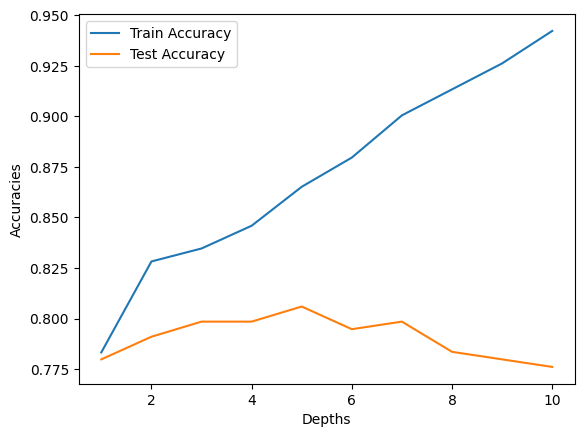

In [ ]:
plt.plot(depths, train_acc, label = "Train Accuracy")
plt.plot(depths, test_acc , label = "Test Accuracy")
plt.xlabel("Depths")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

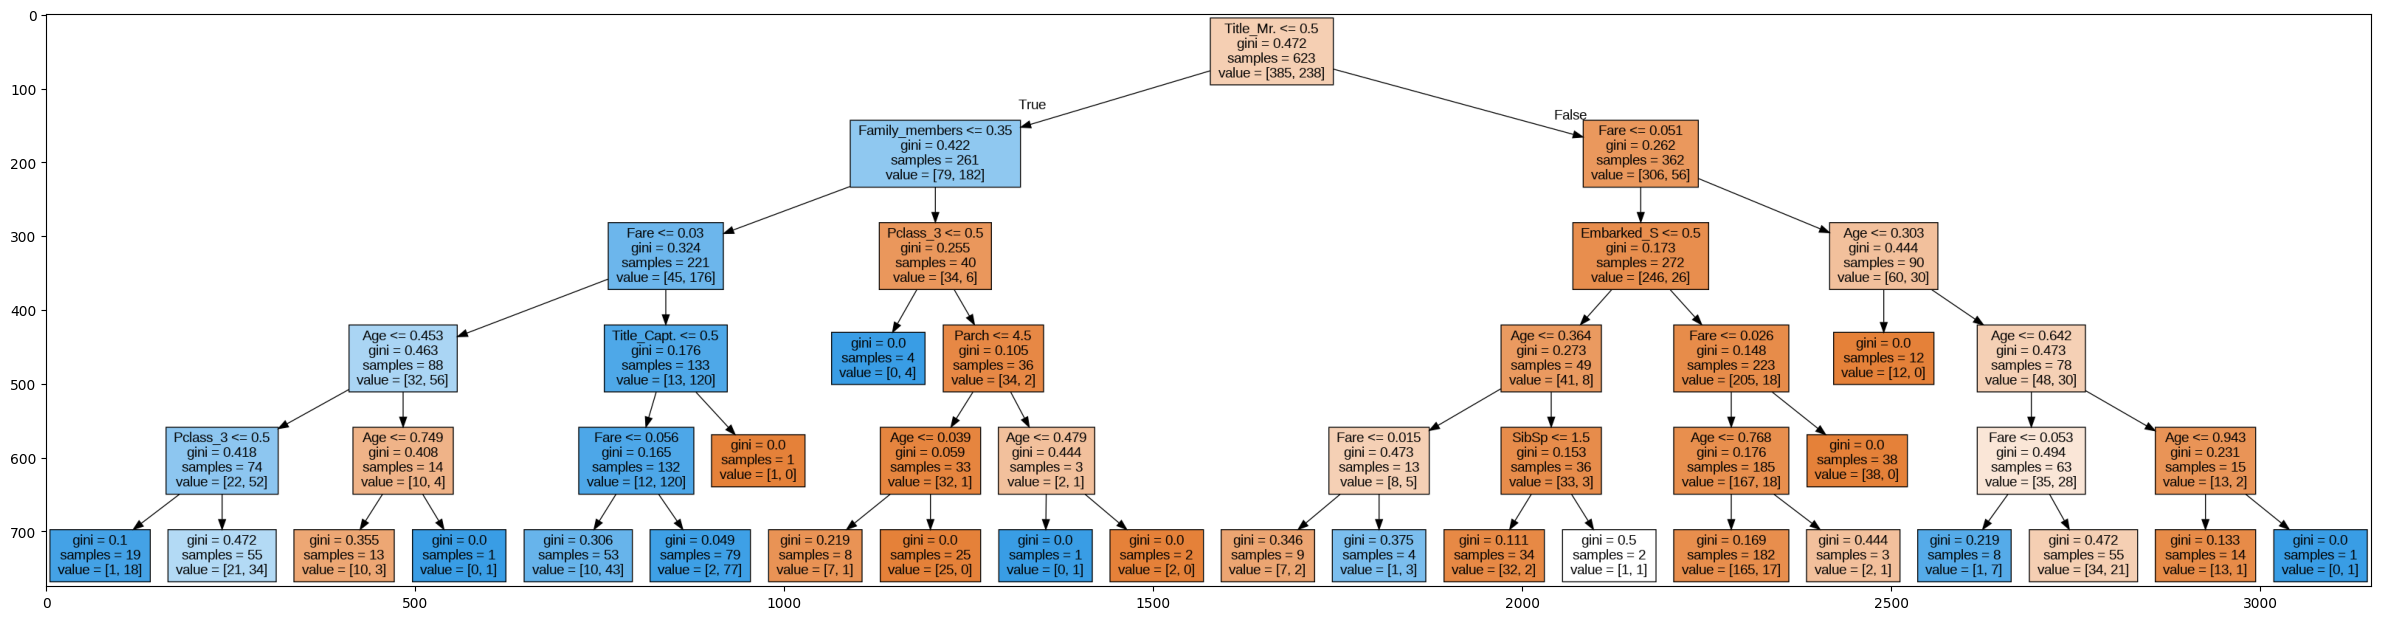

In [ ]:
dt2 = DecisionTreeClassifier(max_depth = best_depth , random_state = 42)

dt2.fit(X_train , y_train)

from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt2, out_file='tree.dot', feature_names=X_train.columns, max_depth=best_depth, filled=True)
!dot -Tpng tree.dot -o tree.png
image = plt.imread('tree.png')
plt.figure(figsize=(30,30))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
print("Maximum training accuracy of simple Decision Tree Classifier:" , max(train_acc))
print("Maximum testing accuracy of simple Decision Tree Classifier:" , max(test_acc))

Maximum training accuracy of simple Decision Tree Classifier: 0.942215088282504
Maximum testing accuracy of simple Decision Tree Classifier: 0.8059701492537313




this graphviz chart just gives a visual representation of the decision process of the model.

Basically in each block(node) there are 4 fields :

1) The main feature used to make the decision at that node.

 For eg: In this graph , at the root node the Title_Mr feature is used to make the first decision , and we are saying that if this person had the title of Mr. go to the right else go to the left.

2) The gini impurity.

This is basically a measure of how good a feature is at deciding the outcome.
Ideally , we want features that can singlehandedly decide the outcome.

For eg: A dataset of 100 patients where the features are 10 health parameters and the labels are 0 and 1, whether they have diabetes or not. Let's say there's a feature "unhealthy_diet" , 40 patients have an unhealthy diet and 60 don't.
If all the 40 patients with an unhealthy diet have diabetes , and the 60 patients without an unhealthy diet don't have diabetes , it mean's that when "unhealthy_diet"=0 , diabetes= 0 , 100% of the time , and when "unhealthy_diet"=1 , diabetes = 1 , also 100% of the time , making the gini impurity 0. This would be considered an ideal feature since it's singlehandedly able to make a decision.

If it was something like , out of the 40 with an unhealthy diet only 30 have diabetes and 10 don't , then "unhealthy_diet" would become impure with a gini score >0 since now it's not a definitive predictor of the outcome.

In this case , the algorithm first calculated the gini impurity of all the features , and compared their gini values.The one with the least value(the least impurity)became the root node , so in our case , Title_Mr became the root node.

Then , the same process was carried out for the node on the left of Title_Mr.In this case Family_Members was the feature chosen because it was the best at deciding the outcome.The same thing will happen on the right of Title_Mr , and then on the left and right of Family_Members , and so on.

Hence , it makes sense that the gini score should keep on decreasing and approach 0 , because when it does we know that we have reached a feature which gives a definite answer 100% of the time , which is basically a leaf. There is no need to go any further because we've traversed the entire tree , asking yes or no questions, and reached a feature which is the sole predictor of the outcome.


3) The number of samples of that node

0.7 * 891 = 623 so at first in the root node there's 623 samples , and then in the left node there's 261 because there must've been 261 samples with
Title_Mr = 0 and on the right there's 362 because there's 362 samples with Title_Mr = 1. (261 + 362 = 623). Hence the sum of the number of samples of the children of a root is equal to the number of samples in the root. And then this 261 will get split into 221 and 40 because there's 221 samples with Title_Mr = 0 and Family_members<=0.35 , and 40 samples with Title_Mr = 1 and Family_members>=0.35

4) The distribution of samples

It just shows how many samples of this feature have 1 as the final outcome , and 0 as the final outcome. For eg: in the first left node , Family_members <= 0.35 and Title_Mr = 0 , value = [79,182].This means , we took all the samples which satisfy these two conditions and checked whether their final label was 0 or 1 , and kept a count. 79,182 means 79 samples satisfying this condition had the label 0 (not survived) and 182 had the label 1 (survived). This is the "output" of the graph we've made , all we have to do is go to a leaf and check it's distribution. If it's something like [100,0] , 100 didn't survive and 0 survived , on reaching this leaf the decision to be made is "did not survive" , and if it's something like [0,100] , 100 survived ,the decision to be made here is "survived".


# Naive Bayes Algorithm

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#checking to see which is best , Gaussian , Multinomial, Bernoulli , Categorical or Complement

from sklearn.naive_bayes import GaussianNB

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GridSearchCV(estimator=GaussianNB(),
                 param_grid=param_grid,
                 cv=fivefold,
                 scoring='accuracy')

#here cv=fivefold means that both hyperparameter tuning , and cross validation will happen.first hyperparameters are set.
#then cv is done to basically do train the model but in a better way than train test split. and then the hyperparameters giving the best accuracy
#are selected to be passed in the model.


#so gnb is now a grid search cv object , which itself is basically the model but with extra functionality of hyperparameter tuning

# print(np.median(cross_val_score(gnb , X_train , y_train , cv=fivefold))) #finding the cross val score of this hyperparam tuned model

gnb.fit(X_train , y_train)

gnb.best_estimator_.score(X_test , y_test)


0.7873134328358209

In [ ]:
from sklearn.naive_bayes import MultinomialNB
param_grid = {
    'alpha': np.logspace(0,-9, num=100)
    }


mnb = GridSearchCV(estimator=MultinomialNB(),
                 param_grid=param_grid,
                 cv=fivefold,
                 scoring='accuracy')

mnb.fit(X_train , y_train)

mnb.best_estimator_.score(X_test , y_test)



0.7873134328358209

In [ ]:
from sklearn.naive_bayes import BernoulliNB

param_grid = {
    'alpha': np.logspace(0,-9, num=100)
    }


bnb = GridSearchCV(estimator=BernoulliNB(),
                 param_grid=param_grid,
                 cv=fivefold,
                 scoring='accuracy')

bnb.fit(X_train , y_train)

bnb.best_estimator_.score(X_test , y_test)

0.8022388059701493

In [ ]:
from sklearn.naive_bayes import ComplementNB

param_grid = {
    'alpha': np.logspace(0,-9, num=100)
    }


cnb = GridSearchCV(estimator=ComplementNB(),
                 param_grid=param_grid,
                 cv=fivefold,
                 scoring='accuracy')


cnb.fit(X_train , y_train)

cnb.best_estimator_.score(X_test , y_test)

0.8022388059701493

In [ ]:
#bernoulli giving best acc maybe because most features are binary.

## Optimizing Methods

### 1. Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 32)
param_grid = {
    'n_estimators' :[10,20,50,100],
    'max_depth' : [1,2,4,6,8],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2],
    'bootstrap' : [True , False]
}

rfcWithGS = GridSearchCV(rfc , param_grid)
rfcWithGS.fit(X_train , y_train)
rfcWithGS.best_estimator_.score(X_test , y_test)


0.8097014925373134

## BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier
dtc = DecisionTreeClassifier(max_depth = best_depth , random_state = 32)
param_grid = {
    'n_estimators': [10, 20 , 50 , 100],
    'max_samples': [0.1 , 0.5  , 1.0],
}
bc = BaggingClassifier(dtc , random_state = 32)
bcWithGS = GridSearchCV(bc , param_grid )
bcWithGS.fit(X_train, y_train)
bcWithGS.best_estimator_.score(X_test , y_test)

0.8283582089552238

### 2. Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(max_depth = best_depth , random_state = 32)
abc = AdaBoostClassifier(dtc , random_state = 32)

param_grid = {
'n_estimators': [10,20,50,100] ,
'learning_rate' : [(0.97 + x / 100) for x in range(0, 8)],
 'algorithm': ['SAMME', 'SAMME.R']
}

abcWithGS = GridSearchCV(abc , param_grid)
abcWithGS.fit(X_train , y_train)
abcWithGS.best_estimator_.score(X_test , y_test)

0.8208955223880597

### 3. Pruning Techniques

In [ ]:
#pre pruning
param_grid = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier(random_state = 32)
gcv = GridSearchCV(clf,param_grid)
gcv.fit(X_train,y_train)
gcv.best_estimator_.score(X_test , y_test)

0.7910447761194029

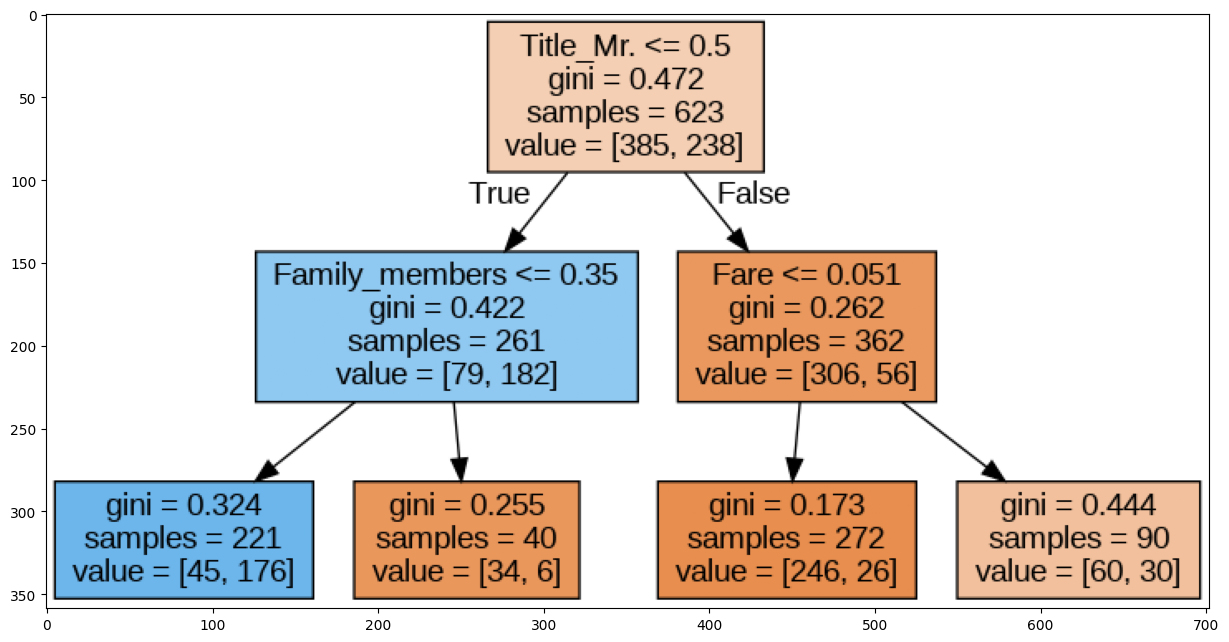

In [ ]:
from sklearn import tree
decision_tree = tree.export_graphviz(gcv.best_estimator_, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)